<a href="https://colab.research.google.com/github/FGalvao77/Criando-Dashboards-interativos-em-Python-com-auxilio-do-Plotly-e-Cufflinks/blob/main/Criando_Dashboards_interativos_em_Python_com_aux%C3%ADlio_do_Plotly_e_Cufflinks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Criando _Dashboards_ interativos em Python com auxílio do `Plotly` e `Cufflinks`**

Quando estamos fazendo a análise dos dados uma das práticas mais corriqueiras é plotar gráficos para nos auxiliar nas observações e entender melhor como os dados estão distribuídos, para essa necessidade temos o `Plotly`.

É uma biblioteca do Python que é utilizada para gerar gráficos, melhor que isso ela nos permite visualizar esses gráficos de forma interativa.

Vamos ver como isso funciona!

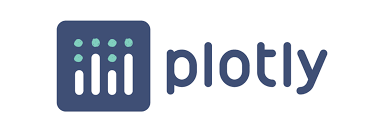

- https://plotly.com/

- [Cufflinks](https://pypi.org/project/cufflinks/)

In [1]:
# instalando o Plotly e o Cufflinks - o Cufflinks conecta o Pandas ao Plotly
!pip install cufflinks
!pip install plotly 

In [1]:
# importando biblioteca para ignorar mensagens de erros
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importando as bibliotecas/funções iniciais
import pandas as pd
import numpy as np
import cufflinks as cf 
import plotly.offline as pyo
import plotly.graph_objs as go # função para criar os gráficos
import matplotlib.pyplot as plt
# from plotly.offline import plot, iplot, download_plotlyjs, init_notebook_mode

# pd.options.plotting.backend = 'plotly'
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,7)

In [3]:
# criando um dataframe com dados aleatórios com 50 observações e divididos em 5 colunas 
# df = pd.DataFrame(np.random.randn(50, 5),
#                   columns = ['col_A', 'col_B', 'col_C', 'col_D', 'col_E'])

df = pd.DataFrame(np.random.randn(50, 5), 
                  columns='col_A col_B col_C col_D col_E'.split())

In [4]:
# visualizando as 5 primeiras linhas
df.head()

,col_A,col_B,col_C,col_D,col_E
0,0.868610,-1.017254,0.770971,-1.835280,-0.882129
1,0.352312,0.376311,1.097250,0.424578,0.310536
2,0.801629,0.252503,1.927453,-1.700034,-1.471657
3,2.170348,-1.775791,0.140191,-0.729708,-0.101519
4,-0.770124,0.338798,-0.319307,-1.232743,-0.573923


In [5]:
# dimensão do conjunto de dados
df.shape    # linhas e colunas

(50, 5)

Para que os gráficos sejam gerados dentro do Jupyter Notebook (localmente) precisamos habilitar o modo offline.

In [6]:
# cf.go_online()
cf.go_offline()
pyo.init_notebook_mode(connected = True)

In [7]:
# importando função para redenzirar a exibição do gráficos
import plotly.io as pio

# visualizando os argumentos aceitos pela função
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [8]:
# instanciando o argumento "colab" para exibição no ambiente do google colab
pio.renderers.default = 'colab'

**Gerando um gráfico de linhas para cada coluna do DataFrame**

In [9]:
# !pip install chart_studio

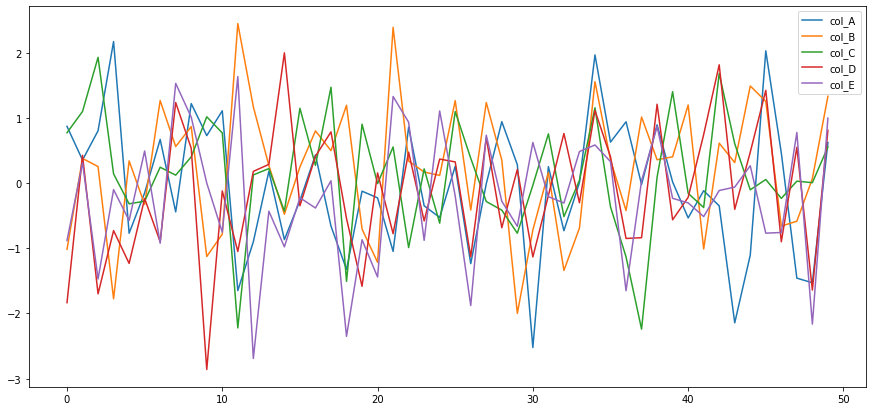

In [10]:
# realizando o plot do gráfico "normal"
df.plot();

In [11]:
# realizando o polt do gráfico interativo
df.iplot()

> Podemos desabilitar a visualização de algumas colunas.

**Gráfico do tipo Scatter**

Conhecidos como gráficos de dispersão, são utilizados para representar a relação (positiva ou negativa) entre duas ou mais variáveis. No parâmetro color definimos as cores para os pontos.

In [12]:
df.iplot(kind='scatter', 
         x='col_A', y='col_B', 
         title='Dispersão entre os atributos "col_A" e "col_B"', 
         color='purple', mode='markers')

> Entre parênteses temos os valores do eixo x e do eixo y respectivamente.

**Gráfico de Barras**

O tamanho das barras é proporcional a contagem de registro de cada coluna. A contagem é feita com o método sum().

In [13]:
df.sum().iplot(kind='bar', title='Gráfico de barras do atributos', color='lightgreen')

> Os valores podem ser diferentes, pois estamos gerando dados aleatórios.

**Histogramas**

Com o histograma conseguimos visualizar a frequência dos dados da coluna A.

In [14]:
df['col_A'].iplot(kind='hist', bins=50, 
              title='Histograma do atributo "col_A"')

> Por padrão tenta definir a quantidade de bins ideais.

**Histogramas aninhados**

Como as colunas têm o mesmo tipo de dados podemos plotar um histograma para cada coluna.

In [15]:
df.iplot(kind='hist',
         title='Histograma aninhado')

**Bubble Plots (gráfico de bolhas)**

Permite a visualização de 3 variáveis. O parâmetro size define o tamanho da bolha. No nosso exemplo o tamanho das bolhas é de acordo com os valores da coluna C.

In [17]:
df.iplot(kind='bubble', 
         x='col_A',y='col_B', 
         size='col_C', colors='green')

> Quanto maior o número, maior são as bolhas.

**Scatter Matrix**

Semelhante ao pairplot do Seaborn ele plota um histograma e um gráfico de dispersão para cada coluna numérica do DataFrame. Se o DataFrame for muito grande ele pode travar seu Jupyter Notebook.

In [18]:
df.scatter_matrix()

**Visualizando dados de vendas**

O dataset utilizado será o Olist uma base de dados de um E-commerce brasileiro, se quiser conhecer mais sobre esse dataset, segue o link https://www.kaggle.com/olistbr/brazilian-ecommerce/version/2 

O dataset em questão consegui no github:
  - https://github.com/DeepakKumarGS/E-Commerce-Data-Analysis-/blob/master/olist_classified_public_dataset.csv

In [19]:
# carregando o conjunto de dados para o ambiente de trabalho
!wget https://raw.githubusercontent.com/DeepakKumarGS/E-Commerce-Data-Analysis-/master/olist_classified_public_dataset.csv

--2022-05-22 15:48:58--  https://raw.githubusercontent.com/DeepakKumarGS/E-Commerce-Data-Analysis-/master/olist_classified_public_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1310005 (1.2M) [text/plain]
Saving to: ‘olist_classified_public_dataset.csv.3’

olist_classified_pu 100%[===================>]   1.25M  --.-KB/s    in 0.05s   

2022-05-22 15:48:58 (23.7 MB/s) - ‘olist_classified_public_dataset.csv.3’ saved [1310005/1310005]



In [20]:
# visualizando o diretório principal de trabalho
%ls

'Mes destaque de vendas.html'            sample_data/
 olist_classified_public_dataset.csv     temp-plot.html
 olist_classified_public_dataset.csv.1  'Vendas no periodo 2017 e 2018.html'
 olist_classified_public_dataset.csv.2  'Vendas por categoria de Produtos.html'
 olist_classified_public_dataset.csv.3


In [21]:
# visualizando o conjunto de dados
!head olist_classified_public_dataset.csv

,id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,customer_zip_code_prefix,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,votes_before_estimate,votes_delayed,votes_low_quality,votes_return,votes_not_as_anounced,votes_partial_delivery,votes_other_delivery,votes_other_order,votes_satisfied,most_voted_subclass,most_voted_class
0,1,delivered,89.99,14.38,1,1,2017-08-30 11:41:01.000000,2017-08-30 11:55:08.970352,2017-09-21 00:00:00.000000,2017-09-08 20:35:27.276847,Belo Horizonte,MG,308,beleza_saude,59,492,3,5,,tudo certo,2017-09-09 00:00:00.000000,2017-09-10 03:27:54+00:00,0,0,0,0,0,0,0,0,3,satisfeito,satisfeito_com_pedido
1,2,delivered,69,15.23,1,1,2017-09-26 09:13:36.000000,2017

Outra forma de carregar o conjunto de dados para o ambiente do [google colab](https://colab.research.google.com/) é através da função `files` do módulo "**.colab**" da biblioteca [google](https://pypi.org/project/google/).

In [22]:
# # carregando o conjunto de dados para o google colab utilizando a função "files"
# from google.colab import files

# instanciando um oobjeto para receber o conjunto de dados
# uploaded = files.upload()

In [23]:
# instanciando o conjunto de dados no objeto "df"
df = pd.read_csv('/content/olist_classified_public_dataset.csv', index_col=0)

In [24]:
# visualizando as 5 primeiras observações do conjunto de dados
df.head()

,id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,votes_delayed,votes_low_quality,votes_return,votes_not_as_anounced,votes_partial_delivery,votes_other_delivery,votes_other_order,votes_satisfied,most_voted_subclass,most_voted_class
0,1,delivered,89.99,14.38,1,1,2017-08-30 11:41:01.000000,2017-08-30 11:55:08.970352,2017-09-21 00:00:00.000000,2017-09-08 20:35:27.276847,...,0,0,0,0,0,0,0,3,satisfeito,satisfeito_com_pedido
1,2,delivered,69.00,15.23,1,1,2017-09-26 09:13:36.000000,2017-09-26 09:28:10.922048,2017-10-24 00:00:00.000000,2017-09-29 21:13:04.984841,...,0,0,0,0,0,0,0,0,antes_prazo,satisfeito_com_pedido
2,3,delivered,99.80,15.86,2,4,2018-01-15 15:50:42.000000,2018-01-17 07:29:56.419769,2018-02-05 00:00:00.000000,2018-01-23 17:51:31.134866,...,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega
3,4,delivered,87.00,12.74,1,1,2018-02-04 11:16:42.000000,2018-02-06 05:31:50.990164,2018-03-13 00:00:00.000000,2018-02-20 19:38:06.633080,...,3,0,0,0,0,0,0,0,atrasado,problemas_de_entrega
4,5,delivered,99.90,17.95,1,2,2017-12-07 11:58:42.000000,2017-12-08 02:36:49.587515,2018-01-03 00:00:00.000000,2017-12-19 22:33:18.952512,...,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega


> Na imagem acima só temos algumas colunas (no total são 34 colunas)

In [25]:
# quantidade de linhas e colunas
df.shape

(3584, 33)

In [26]:
# informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3584 entries, 0 to 3583
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             3584 non-null   int64  
 1   order_status                   3584 non-null   object 
 2   order_products_value           3584 non-null   float64
 3   order_freight_value            3584 non-null   float64
 4   order_items_qty                3584 non-null   int64  
 5   order_sellers_qty              3584 non-null   int64  
 6   order_purchase_timestamp       3584 non-null   object 
 7   order_aproved_at               3584 non-null   object 
 8   order_estimated_delivery_date  3584 non-null   object 
 9   order_delivered_customer_date  3467 non-null   object 
 10  customer_city                  3584 non-null   object 
 11  customer_state                 3584 non-null   object 
 12  customer_zip_code_prefix       3584 non-null   i

> Uma forma clara é objetiva de obter insights é fazendo algumas perguntas ao nosso conjunto de dados. Então vamos as nossas perguntas!

**Qual a distribuição dos status dos pedidos?**

In [27]:
df.order_status.value_counts().iplot(kind='bar', 
                                     title='Status dos pedidos')

> A maior concentração se encontra nos pedidos entregues.

**Quais os meses do ano houve mais vendas?**

Para trabalhar com dados de Data precisamos primeiro transformar o tipo desse dado para datetime.

In [28]:
df.order_purchase_timestamp = pd.to_datetime(df.order_purchase_timestamp)

Nossos dados estão no formato diário, para responder a nossa pergunta precisamos formatar esses dados para meses.

In [29]:
# criando uma nova coluna e usando o método to_periodo() com o ´M´ para formatar os dados
df['order_purchase_month'] = df.order_purchase_timestamp.dt.to_period('M').astype(str)

In [30]:
# visualizando as 15 primeiras linhas da coluna
df.order_purchase_month.head(15)

0     2017-08
1     2017-09
2     2018-01
3     2018-02
4     2017-12
5     2017-11
6     2017-11
7     2017-12
8     2017-07
9     2017-11
10    2018-02
11    2017-04
12    2017-09
13    2018-01
14    2017-06
Name: order_purchase_month, dtype: object

Vamos criar a variável vendas_por_mes que será a soma do valor dos produtos agrupados por mês.

In [31]:
vendas_por_mes = df.groupby(by='order_purchase_month').order_products_value.sum()

In [32]:
# visualizando os valores de vendas por mês em ordem decrescente
vendas_por_mes.sort_values(ascending=False)

order_purchase_month
2017-11    55373.92
2017-07    47284.74
2018-01    46755.56
2017-09    45462.20
2017-12    43806.57
2018-02    42560.54
2017-10    40910.40
2017-08    39898.85
2017-06    34172.86
2018-03    33435.48
2017-05    25556.23
2017-04    17654.19
2018-04     3754.33
2017-03      902.86
2017-02        9.99
Name: order_products_value, dtype: float64

Anteriormente usamos o Cufflinks para fazer a integração com o Pandas, a partir de agora vamos trabalhar somente com o Plotly.

In [34]:
# # importando os módulos
import plotly as py
# import plotly.graph_objs as go

In [35]:
# habilitando o modo offline
py.offline.init_notebook_mode(connected=True)

In [37]:
# importando função para redenzirar a exibição do gráficos
import plotly.io as pio

# visualizando os argumentos aceitos pela função
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [38]:
# instanciando o argumento "colab" para exibição no ambiente do google colab
pio.renderers.default = 'colab'

O plotly.graph_objs é o responsável por manipular todos os métodos dos gráficos.

**Estrutura da criação dos gráficos com Plotly**

Definição dos dados:

- Eixos (x e y)
- Marcadores (marker)

    data = [go.Bar(x = X, y = Y, marker = {'color': 'lightblue'})]

Definições de layout

- Título (title)
- Layout de eixos (yaxis, xaxis)

    configuracoes_layout = go.Layout( title ='Vendas no Período', 
                                    yaxis={'title':'Valores em vendas'},
                                    xaxis={'title':'Período'})

Objeto figura

- Definição de subplots
- Dados e layout

    fig = go.Figure(data =data, layout=configuracoes_layout)

Plota o gráfico

    pyo.iplot(fig)

**A seguir alguns gráficos de acordo com essa estrutura**

In [39]:
# por padrão o iplot() plota um gráfico de linha, da sentido de valor acumulado:
# import plotly.offline as pyo
# import plotly.graph_objs as go

data = [go.Scatter(x = vendas_por_mes.index,
                   y = vendas_por_mes.values)]

# py.iplot(data)
pyo.iplot(data)

**Customizando o gráficos de barras**

Vamos colocar um título para esse gráfico e uma descrição para os eixos (x e y).

In [40]:
data = [go.Bar(x = vendas_por_mes.index,
               y = vendas_por_mes.values,
               marker = {'color': 'lightblue'})]

# criando o layout
configuracoes_layout = go.Layout(title = 'Vendas no Periodo',
                                 yaxis = {'title':'Valores em Vendas'},
                                 xaxis = {'title': 'Periodo'})

# objeto da figura
fig = go.Figure(data = data, layout = configuracoes_layout)

# plotando o grafico
pyo.iplot(fig)

> Nosso gráfico agora tem as barras da cor azul e definimos e um título, além de uma descrição nos eixos.

**Definindo ajustes em linhas e cores**

Colocando um contorno para destacar mais as barras do gráfico.

In [41]:
#  parâmetro opacity e width
data = [go.Bar(x = vendas_por_mes.index,
               y = vendas_por_mes.values,
               marker = {'color': 'lightblue',
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7
              )
       ]

# criando layout
configuracoes_layout = go.Layout(title = 'Vendas no Periodo',
                                 yaxis = {'title':'Valores em Vendas'},
                                 xaxis = {'title':'Periodo'})

# objeto da figura
fig = go.Figure(data = data, 
                layout = configuracoes_layout)

# plotando o grafico
pyo.iplot(fig)

> Veja como houve uma melhora na visualização.

**Destacando uma barra**


Seria interessante verificar quais foram os meses que tiveram as vendas abaixo da média.

In [43]:
cores = []
# valor de média para ser testado
media = vendas_por_mes.values.mean().round(2)
media

31835.91

In [44]:
# se o valor de vendas do mês for menor que a média 
# a lista de cor será vermelha, senão azul
for x in vendas_por_mes.values:
    if x < media:
        cores.append('red')
    else:
        cores.append('lightblue')

In [45]:
# gerando o gráfico de vendas no período
data = [go.Bar(x = vendas_por_mes.index,
               y = vendas_por_mes.values,
               marker = {'color': cores,  # lista de cores
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7
              )
       ]

# criando o layout
configuracoes_layout = go.Layout(title = 'Vendas no Periodo',
                                 yaxis = {'title':'Valores em Vendas'},
                                 xaxis = {'title':'Periodo'})

# objeto da figura
fig = go.Figure(data = data, 
                layout = configuracoes_layout)

# plotando o gráfico
# py.iplot(fig, filename = 'Meses que nao superaram a meta de vendas')
pyo.iplot(fig, filename = 'Meses que nao superaram a meta de vendas')

> Em vermelho temos os meses em que os valores das vendas foi abaixo da média.

No parâmetro color passamos a nossa lista de cores criada anteriormente.

**Destacar a barra com o maior valor de venda e minimizando a visão de todas as outras**

Que tal visualizar o mês que teve o maior número de vendas.

In [46]:
# visualizando o valor máximo
maximo_de_vendas = vendas_por_mes.values.max()
maximo_de_vendas

55373.92

In [47]:
# alimentando a lista de cores
cores = []

for x, y in zip(vendas_por_mes.values, vendas_por_mes.index):
    if x == maximo_de_vendas:
        mes_maximo_de_vendas = y
        cores.append('blue')
    else:
        cores.append('lightgray')


# plota o gráfico de vendas com um destaque de cor e anotação para o mês que teve mais vendas
data = [go.Bar(x = vendas_por_mes.index,
               y = vendas_por_mes.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                 'width': 2}
                        },
               opacity= 0.7
              )
       ]

# criando o layout
configuracoes_layout = go.Layout(title = 'Vendas no Periodo',
                                 yaxis = {'title': 'Valores em Vendas'},
                                 xaxis = {'title': 'Periodo'},
                                 # texto na barra de destaque
                                 annotations = [{'text':'Mês destaque de vendas',
                                                'x': mes_maximo_de_vendas,
                                                'y': maximo_de_vendas}
                                               ]
                                                                                              
                                )

# objeto da figura
fig = go.Figure(data = data, 
                layout = configuracoes_layout)

# plotando o gráfico
# py.plot(fig, filename = 'Mes destaque de vendas')
pyo.plot(fig, filename = 'Mes destaque de vendas')

'Mes destaque de vendas.html'

> Novembro foi o mês que teve mais vendas.


**Visualizando duas informações no mesmo gráfico**

Comparando as vendas entre dois anos.

In [48]:
# vamos definir alguns valores ficticios para vendas do ano anterior
vendas_ano_anterior = vendas_por_mes - 10000.00
vendas_ano_anterior

order_purchase_month
2017-02    -9990.01
2017-03    -9097.14
2017-04     7654.19
2017-05    15556.23
2017-06    24172.86
2017-07    37284.74
2017-08    29898.85
2017-09    35462.20
2017-10    30910.40
2017-11    45373.92
2017-12    33806.57
2018-01    36755.56
2018-02    32560.54
2018-03    23435.48
2018-04    -6245.67
Name: order_products_value, dtype: float64

In [49]:
# gráfico de barras aninhadas
data = [go.Bar(x = vendas_por_mes.index,
               y = vendas_por_mes.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity = 0.7,
               name='2017'
              ),
# definindo outro plot de barras com valores dos meses passados        
        go.Bar(x = vendas_ano_anterior.index,
               y = vendas_ano_anterior.values,
               name = '2016',
               marker = {'color': 'lightgreen',
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity = 0.7
              )
              
       ]

# criando o layout
configuracoes_layout = go.Layout(title = 'Vendas no Periodo',
                                 yaxis = {'title':'Valores em Vendas'},
                                 xaxis = {'title': 'Periodo'},
                                 annotations = [{'text':'Mês destaque de vendas',
                                                'x': mes_maximo_de_vendas,
                                                'y': maximo_de_vendas}
                                               ]                       
                                
                                )

# objeto da figura
fig = go.Figure(data = data, 
                layout = configuracoes_layout)

# plotando o gráfico
# py.plot(fig, filename = 'Vendas no periodo 2017 e 2018')
pyo.plot(fig, filename = 'Vendas no periodo 2017 e 2018')

'Vendas no periodo 2017 e 2018.html'

> De verde temos os dados de 2018 e de cinza os dados de 2017.

**Vendas por categorias de produtos**

Vamos visualizar quais foram os produtos mais vendidos.

In [50]:
# conta quantos produtos por categoria e coloca dentro da variável vendas_produto_por_categoria
vendas_produto_por_categoria =  df.groupby(by='product_category_name').id.count()
vendas_produto_por_categoria.sort_values(ascending=False)

product_category_name
cama_mesa_banho                                   471
moveis_decoracao                                  302
beleza_saude                                      253
esporte_lazer                                     224
informatica_acessorios                            215
utilidades_domesticas                             199
ferramentas_jardim                                197
relogios_presentes                                196
cool_stuff                                        152
perfumaria                                        140
brinquedos                                        137
automotivo                                        134
fashion_bolsas_e_acessorios                       125
telefonia                                         118
bebes                                              83
moveis_escritorio                                  77
papelaria                                          65
eletronicos                                        55
pet_sh

In [51]:
# vamos filtrar e pegar somente as categorias com quantidade de vendas maiores que 10
vendas_produto_por_categoria = vendas_produto_por_categoria.loc[vendas_produto_por_categoria.values > 10]
vendas_produto_por_categoria.sort_values(ascending=False)

product_category_name
cama_mesa_banho                      471
moveis_decoracao                     302
beleza_saude                         253
esporte_lazer                        224
informatica_acessorios               215
utilidades_domesticas                199
ferramentas_jardim                   197
relogios_presentes                   196
cool_stuff                           152
perfumaria                           140
brinquedos                           137
automotivo                           134
fashion_bolsas_e_acessorios          125
telefonia                            118
bebes                                 83
moveis_escritorio                     77
papelaria                             65
eletronicos                           55
pet_shop                              52
malas_acessorios                      49
consoles_games                        32
casa_conforto                         31
eletrodomesticos                      29
eletroportateis                    

In [52]:
# ordenando os valores do maior para o menor
vendas_produto_por_categoria.sort_values(ascending=False, inplace=True)
vendas_produto_por_categoria

product_category_name
cama_mesa_banho                      471
moveis_decoracao                     302
beleza_saude                         253
esporte_lazer                        224
informatica_acessorios               215
utilidades_domesticas                199
ferramentas_jardim                   197
relogios_presentes                   196
cool_stuff                           152
perfumaria                           140
brinquedos                           137
automotivo                           134
fashion_bolsas_e_acessorios          125
telefonia                            118
bebes                                 83
moveis_escritorio                     77
papelaria                             65
eletronicos                           55
pet_shop                              52
malas_acessorios                      49
consoles_games                        32
casa_conforto                         31
eletrodomesticos                      29
eletroportateis                    

In [53]:
trace0 = go.Bar(y = vendas_produto_por_categoria.values,
                x = vendas_produto_por_categoria.index,
                marker = {'color': 'darkblue'},
                orientation = 'v'
              )

data = [trace0]

# criando o layout
configuracoes_layout = go.Layout(title = 'Vendas por categoria de Produtos',
                   xaxis = dict(titlefont = dict(size = 20),
                                tickangle = 55),
                   yaxis = {'title': 'Quantidade vendida'})

# objeto da figura
fig = go.Figure(data = data, 
                layout = configuracoes_layout)

# plotando o gráfico
pyo.iplot(fig)

**Alterando Faixa de valores dos eixos**

Observe que temos um erro no eixo y, a barra passa do limite referente a quantidade, pra corrigir isso adicionamos 10% ao valor máximo.

In [54]:
# obtendo o valor máximo
max(vendas_produto_por_categoria.values)

471

In [55]:
# adicionando os 10%
max(vendas_produto_por_categoria.values) * 1.10

518.1

In [56]:
trace0 = go.Bar(y = vendas_produto_por_categoria.values,
                x = vendas_produto_por_categoria.index,
                marker = {'color': '#00FF2A'},
                orientation = 'v'
              )

data = [trace0]

# criando o layout
configuracoes_layout = go.Layout(title = 'Vendas por categoria de Produtos',
                   xaxis=dict(
                         titlefont = dict(
                                   size = 15,
                                   color = 'lightgrey'),
                                   tickangle = 45),
                   
                   # valor maximo da faixa + 10%
                   yaxis = {'title': 'Quantidade vendida',
                          'range': [0,max(vendas_produto_por_categoria.values) * 1.10]
                         })

# objeto da figura
fig = go.Figure(data = data, 
                layout  =configuracoes_layout)
                   
# plotando o gráfico
pyo.plot(fig, filename = 'Vendas por categoria de Produtos')

'Vendas por categoria de Produtos.html'

> A faixa de valores começa em 0 e vai até 500.

**Valor de Frete vs Valor de Produto. Existe alguma tendência?**

Podemos verificar se o valor do frete aumenta de acordo com o valor do produto.

In [57]:
# criando gráfico
trace = go.Scatter(x = df['order_freight_value'],
                   y = df['order_products_value'],
                   mode = 'markers',
                   marker = {'color':'#941229'}
                  )
# armazenando gráfico em uma lista
data = [trace]

# criando o layout
layout = go.Layout(title = 'Valor de Frete x Valor de Produto',
                   yaxis = {'title':'Valor do Produto'},
                   xaxis ={ 'title': 'Valor do Frete'})

# criando a figura que será exibida
fig = go.Figure(data = data, 
                layout = layout)

pyo.iplot(fig)

> Temos alguns valores discrepantes apenas.

**Usando o parâmetro text na visualização (parâmetro hover)**

Acrescentamos uma descrição ao pontos de dados, isso ajuda a entender melhor o que queremos representar nesse gráfico.

In [58]:
# criando gráfico
trace = go.Scatter(x = df['order_freight_value'],
                   y = df['order_products_value'],
                   mode = 'markers',
                   # customização do texto a ser exibido no hover
                   text = 'Status do pedido: '+ df['order_status'] +
                           '<br>' + 'Classe: '+ df['most_voted_class']
                   ,
                   # exibição do hover
                   hoverinfo = 'text+x+y',
                   marker = {'color':'#941229'}
                  )

# armazenando gráfico em uma lista
data = [trace]

# criando o layout
layout = go.Layout(title = 'Valor de Frete x Valor de Produto',
                   yaxis = {'title':'Valor do Produto'},
                   xaxis = {'title': 'Valor do Frete'})

# criando a figura que será exibida 
fig = go.Figure(data = data, 
                layout = layout)

pyo.iplot(fig)

**Customização dos eixos com formato em reais R$**

Como estamos falando de valores, é interessante customizar os eixos e usar o R$, especificando que esses valores estão em reais.

In [59]:
# criando gráfico
trace = go.Scatter(x = df['order_freight_value'],
                   y = df['order_products_value'],
                   mode = 'markers',
                   # customização do texto a ser exibido no hover
                   text = 'Status do pedido: '+ df['order_status'] +
                           '<br>' + 'Classe: '+ df['most_voted_class']
                   ,
                   # exibição do hover
                   hoverinfo = 'text+x+y',
                   marker = {'color':'#941229'}
                  )

# armazenando gráfico em uma lista
data = [trace]

# criando o layout
layout = go.Layout(title = 'Valor de Frete x Valor de Produto',

                   # definindo exibicao dos eixos x e y
                   yaxis = {'title':'Valor do Produto', 
                          'tickformat':'.', 
                          'tickprefix':'R$ '},
                   xaxis = {'title': 'Valor do Frete',
                          'tickformat':'.', 
                          'tickprefix':'R$ '})

# criando a figura que será exibida
fig = go.Figure(data=data, 
                layout = layout)

pyo.plot(fig)

'temp-plot.html'

**Plotando um gráfico de pizza**

Qual a distribuição da classificação dos pedidos pelos clientes?

In [60]:
# contando os valores das classes mais votadas
classes_mais_votadas = df.most_voted_class.value_counts()

# criando 0 gráfico
trace = go.Pie(labels = classes_mais_votadas.index,
               values = classes_mais_votadas.values
              )

# armazenando gráfico em uma lista
data = [trace]

# criando o layout
layout = go.Layout(title = 'Classificação de Clientes sobre Pedidos')

# criando a figura que será exibida 
fig = go.Figure(data = data, 
                layout = layout)

pyo.iplot(fig)

**Parametro direction**

Coloca a visualização dos valores do maior para o menor.

In [61]:
# criando o gráfico
trace = go.Pie(labels = classes_mais_votadas.index,
               values = classes_mais_votadas.values,
               direction='clockwise'
              )

# armazenando gráfico em uma lista
data = [trace]

# criando o layout
layout = go.Layout(title = 'Classificação de Clientes sobre Pedidos')

# criando a figura que será exibida
fig = go.Figure(data = data, 
                layout = layout)

pyo.iplot(fig)

**Customizando gráficos de pizza**

Alterando as cores do gráfico.

In [62]:
# criando o gráfico
# ordem do maior valor para o menor:
cores = ['#96D38C','#FEBFB3','#E1396C']


trace = go.Pie(labels = classes_mais_votadas.index,
               values = classes_mais_votadas.values,
               marker = {'colors': cores},
               direction='clockwise'
              )

# armazenando o gráfico em uma lista
data = [trace]

# criando o layout
layout = go.Layout(title = 'Classificação de Clientes sobre Pedidos')

# criando a figura que será exibida
fig = go.Figure(data = data, 
                layout = layout)

pyo.iplot(fig)

**Adicionando linha de contorno**

Ajuda destacar mais as porções e melhora a visualização.

In [63]:
# criando o gráfico
# ordem do maior valor para o menor:
cores = ['#96D38C','#FEBFB3','#E1396C']


trace = go.Pie(labels = classes_mais_votadas.index,
               values = classes_mais_votadas.values,
               marker = {'colors': cores, 
                         'line' : {'color':'#000000','width':2}
                        },
               hoverinfo = 'label+percent+value',
               direction = 'clockwise'
              )

# armazenando o gráfico em uma lista
data = [trace]

# criando o layout
layout = go.Layout(title = 'Classificação de Clientes sobre Pedidos')

# criando a figura que será exibida 
fig = go.Figure(data = data, 
                layout = layout)

pyo.iplot(fig)

**Destacando porções do gráfico**

Vamos destacar a porção que contém problemas de qualidade.

In [64]:
# criando o gráfico
# ordem do maior valor para o menor:
cores = ['#96D38C','#FEBFB3','#E1396C']


trace = go.Pie(labels = classes_mais_votadas.index,
               values = classes_mais_votadas.values,
               marker = {'colors': cores, 
                         'line' : {'color':'#000000','width':2}
                        },
               hoverinfo = 'label+percent+value',
               pull = [0,0,0.1],
               direction = 'clockwise'
              )

# armazenando o gráfico em uma lista
data = [trace]

# criando o layout:
layout = go.Layout(title = 'Classificação de Clientes sobre Pedidos')

# criando a figura que será exibida
fig = go.Figure(data = data, 
                layout = layout)

pyo.plot(fig)

'temp-plot.html'

**Trabalhando com dados financeiros**

São dados de séries temporais (dados sequenciais ao longo do tempo), podem ser dados de ações ou ativos do mercado financeiro.

In [65]:
# base de dados
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

# visualizando as 5 primeiras linhas:
df.head()

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing


Vamos plotar um gráfico de linhas para visualizar o preço de fechamento da ação de 2015 a 2017.

In [66]:
data = [go.Scatter(
          x = df.Date,
          y = df['AAPL.Close'])]

pyo.iplot(data)

**Customizando Faixas de Eixos (range)**

Podemos visualizar o preço de alta e de baixa dessas ações em um mesmo gráfico.

In [67]:
trace_high = go.Scatter(
    x = df.Date,
    y = df['AAPL.High'],
    name = "AAPL High",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

trace_low = go.Scatter(
    x = df.Date,
    y = df['AAPL.Low'],
    name = "AAPL Low",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

data = [trace_high,trace_low]

layout = dict(
    title = "Série com Rangeslider e Botoes",
    xaxis = dict(
        rangeselector = dict(
            buttons = list([
                dict(count = 1,
                     label = '1m',
                     step = 'month',
                     stepmode = 'backward'),
                dict(count = 6,
                     label = '6m',
                     step='month',
                     stepmode = 'backward'),
                dict(step = 'all')
            ])
        ),
        rangeslider = dict(
            visible = True
        ),
        type = 'date'
    )
)

fig = dict(data = data, 
           layout = layout)

pyo.iplot(fig)

Com Rangeslider você pode selecionar a faixa de data que deseja visualizar, já o Rangeselector são botões que você pode criar para uma visualização agrupada dos dados. No exemplo estamos visualizando os dados agrupados de 6 meses.

**Inserindo anotações**

Quando o valor de fechamento da ação é menor que o valor de abertura temos uma vela vermelha, se o valor fechar acima do preço de abertura a vela é verde. Esse gráfico é chamado de Candlestick, cada vela contém os valores de abertura, alta, baixa e fechamento. Outro detalhe é que quanto maior o corpo da vela, maior foi o número de variação dessa ação no dia.

In [68]:
from datetime import datetime

trace = go.Candlestick(x = df['Date'],
                open = df['AAPL.Open'],
                high = df['AAPL.High'],
                low = df['AAPL.Low'],
                close = df['AAPL.Close'])
data = [trace]

layout = {
    'title': 'Apple Preços no Periodo',
    'yaxis': {'title': 'AAPL Stock'},
    'shapes': [{
        'x0': '2016-12-09', 'x1': '2016-12-09',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 2}
    }],
    'annotations': [{
        'x': '2016-12-09', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Inicio do ciclo de alta'
    }]
}

fig = dict(data = data, 
           layout = layout)

pyo.iplot(fig)

**Exportando nosso gráfico para conta do Plotly na nuvem**

- Criar conta no portal plot.ly
- Obter credenciais da API
- Importa método para plot `online`
- Substitua o método iplot() pelo método `plot()`

**Importando método para plot online**

    import chart_studio.plotly as csp

    import chart_studio
    chart_studio.tools.set_credentials_file(username=’abcsd’, api_key=’xxxxx’)

Definimos que os gráficos seriam mostrados somente no Jupyter Notebook, para enviar esses gráficos para a nuvem precisamos alterar isso. Para enviar os gráficos para criar o dashboard, você precisa alterar o pyo.iplot(fig) de cada gráfico para cspo.plot(fig). Você será redirecionado automaticamente para a plataforma do Plotly onde será mostrado os gráficos que você selecionou.

Na parte superior direita ao lado do seu nome de usuário clique em create, dashboard, depois clique em plot em seguida your files. Escolha seu gráfico e logo ele será renderizado e mostrado na tela, selecione quantos gráficos quiser. Feito isso você tem a opção de salvar seu trabalho ou compartilha com outras pessoas (elas não precisam ter uma conta no Plotly).

Link do ``chart-studio``
  - https://chart-studio.plotly.com/organize/home/

In [69]:
# instalando as bibliotecas necessárias
!pip install chart_studio

In [70]:
# importando a função juntamente com o módulo "plotly"
import chart_studio.plotly as csp

In [71]:
# importando a função 
import chart_studio as cs

# instanciando as credenciais de acesso a API
cs.tools.set_credentials_file(username='xxxxxxxx', api_key='xxxxxxxxxxxxxxxxxxx')

In [72]:
from datetime import datetime

trace = go.Candlestick(x = df['Date'],
                open = df['AAPL.Open'],
                high = df['AAPL.High'],
                low = df['AAPL.Low'],
                close = df['AAPL.Close'])
data = [trace]

layout = {
    'title': 'Apple Preços no Periodo',
    'yaxis': {'title': 'AAPL Stock'},
    'shapes': [{
        'x0': '2016-12-09', 'x1': '2016-12-09',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 2}
    }],
    'annotations': [{
        'x': '2016-12-09', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Inicio do ciclo de alta'
    }]
}

fig = dict(data = data, 
           layout = layout)

csp.iplot(fig)

Instalando [session_info](https://pypi.org/project/session-info/) para salvar as versões das bibliotecas/funções utilizadas no notebook.

In [73]:
!pip install session_info

     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8048 sha256=43c005cddaf64a6ea5168d18a67f516a688bd5c74febffb99b61014fb8c7a3fb
  Stored in directory: /root/.cache/pip/wheels/bd/ad/14/6a42359351a18337a8683854cfbba99dd782271f2d1767f87f
Successfully built session-info


In [74]:
# importando a biblioteca
import session_info as si

# visualizando as versões das bibliotecas e/ou funções utilizadas no notebook
si.show(html=False)

-----
chart_studio        NA
cufflinks           0.17.3
matplotlib          3.2.2
numpy               1.21.6
pandas              1.3.5
plotly              5.5.0
session_info        1.0.0
-----
IPython             5.5.0
jupyter_client      5.3.5
jupyter_core        4.10.0
notebook            5.3.1
-----
Python 3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
-----
Session information updated at 2022-05-22 16:01
